In [1]:
import numpy as np
import pandas as pd

In [2]:

df = pd.read_csv('native_data/polyadb_processed_v3_w_hg38.csv', delimiter=',')
df = df.query("site_type == '3_most_exon'").copy().reset_index(drop=True)
#df = df.loc[~df['wide_seq_ext'].str.slice(175 - 70, 175 - 70 + 205).str.contains("AAAAAAA|AAAGAAAA|AAACAAAA|AAAAGAAA|AAAACAAA")].copy().reset_index(drop=True)

print(df)


           gene    gene_id  sitenum  num_sites  pas  \
0       AADACL3  AADACL3.2        2          2    0   
1         ABCA4    ABCA4.1        5          5    0   
2        ABCB10   ABCB10.6        2          7    0   
3        ABCB10   ABCB10.5        3          7    0   
4        ABCB10   ABCB10.4        4          7    2   
5        ABCB10   ABCB10.3        5          7    0   
6        ABCB10   ABCB10.2        6          7    0   
7        ABCB10   ABCB10.1        7          7    0   
8         ABCD3    ABCD3.6        6         15    3   
9         ABCD3    ABCD3.7        7         15    0   
10        ABCD3    ABCD3.8        8         15    2   
11        ABCD3    ABCD3.9        9         15    4   
12        ABCD3   ABCD3.10       10         15    4   
13        ABCD3   ABCD3.11       11         15    2   
14        ABCD3   ABCD3.12       12         15    3   
15        ABCD3   ABCD3.13       13         15    0   
16        ABCD3   ABCD3.14       14         15    0   
17        

In [3]:
#Get PolyADB positions in hg38 coordinates
'''
polyadb_bed_hg19 = pd.read_csv("polyadb_coordinates_utr3_hg19.bed", sep='\t', header=None, names=['chrom', 'pas_pos_hg19', 'end', 'gene', 'gene_id', 'strand'])
polyadb_bed_hg38 = pd.read_csv("polyadb_coordinates_utr3_hg38.bed", sep='\t', header=None, names=['chrom', 'pas_pos_hg38', 'end', 'gene', 'gene_id', 'strand'])

polyadb_bed_hg38 = polyadb_bed_hg38.join(polyadb_bed_hg19[['gene_id', 'pas_pos_hg19']].set_index('gene_id'), on='gene_id', how='inner').copy().reset_index(drop=True)

polyadb_bed_hg38['padb_join_id'] = polyadb_bed_hg38['chrom'] + "_" + polyadb_bed_hg38['pas_pos_hg19'].astype(str) + "_" + polyadb_bed_hg38['gene']
df['padb_join_id'] = df['chrom'] + "_" + df['pas_pos'].astype(str) + "_" + df['gene']

df = df.join(polyadb_bed_hg38[['padb_join_id', 'pas_pos_hg38']].set_index("padb_join_id"), on='padb_join_id', how='inner').copy().reset_index(drop=True)
df['cut_mode_hg38'] = df['cut_mode'] - df['pas_pos'] + df['pas_pos_hg38']
'''
print(len(df))


114605


In [4]:
#Store PolyADB cut mode intervals in hg38

df['start'] = df['cut_mode_hg38'] - 35
df['end'] = df['cut_mode_hg38'] + 35

polyadb_bed = df[['chrom', 'start', 'end', 'gene', 'gene_id', 'strand']].copy().reset_index(drop=True)

polyadb_bed = polyadb_bed.loc[(~polyadb_bed['start'].isnull()) & (polyadb_bed['start'] > -1)].copy().reset_index(drop=True)

polyadb_bed.to_csv("polyadb_cut_mode_coordinates_hg38.bed", sep='\t', header=False, index=False)


In [5]:
#Load perturb-seq experimental data (knockout gene-level)

perturb_df = pd.read_csv("perturb/pseudobulk_counts_de_novo_polyA_sites_by_gene.tsv", sep='\t').query("misprime == False").copy().reset_index(drop=True)

perturb_df['start'] = perturb_df['Position'].astype(int)
perturb_df['end'] = perturb_df['Position'].astype(int) + 1

perturb_df = perturb_df.rename(columns={'Chromosome' : 'chrom', 'symbol' : 'gene'})
perturb_df['chrom'] = 'chr' + perturb_df['chrom'].astype(str)

perturb_df = perturb_df[['chrom', 'start', 'end', 'gene', 'NT', 'CDC73', 'CPSF1', 'CPSF2', 'CPSF3', 'CPSF3L', 'CPSF4', 'CPSF6', 'CSTF1', 'CSTF3', 'CTR9', 'FIP1L1', 'LEO1', 'NUDT21', 'PABPC1', 'PABPN1', 'PAF1', 'PAPOLA', 'PCF11', 'RBBP6', 'RPRD1A', 'RPRD1B', 'SCAF8', 'SF3A1', 'SRSF3', 'SYMPK', 'THOC5']]


/home/jlinder2/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:

perturb_df


,chrom,start,end,gene,NT,CDC73,CPSF1,CPSF2,CPSF3,CPSF3L,...,PAPOLA,PCF11,RBBP6,RPRD1A,RPRD1B,SCAF8,SF3A1,SRSF3,SYMPK,THOC5
0,chrX,293484,293485,PLCXD1,349.0,66.0,49.0,31.0,21.0,15.0,...,114.0,12.0,57.0,53.0,205.0,179.0,3.0,45.0,7.0,35.0
1,chrX,299444,299445,PLCXD1,274.0,63.0,50.0,47.0,40.0,7.0,...,34.0,10.0,39.0,90.0,135.0,172.0,2.0,56.0,7.0,35.0
2,chrX,303356,303357,PLCXD1,1036.0,128.0,179.0,237.0,202.0,80.0,...,391.0,88.0,211.0,223.0,327.0,565.0,13.0,158.0,57.0,174.0
3,chrX,1309922,1309923,CSF2RA,18.0,2.0,3.0,2.0,3.0,2.0,...,12.0,1.0,5.0,8.0,5.0,15.0,0.0,2.0,1.0,1.0
4,chrX,1599220,1599221,AKAP17A,39.0,6.0,6.0,3.0,11.0,3.0,...,14.0,5.0,11.0,6.0,15.0,22.0,4.0,7.0,1.0,4.0
5,chrX,1602520,1602521,AKAP17A,1019.0,162.0,178.0,209.0,226.0,140.0,...,353.0,126.0,293.0,169.0,422.0,575.0,71.0,125.0,61.0,156.0
6,chrX,2717856,2717857,CD99,356.0,67.0,47.0,58.0,75.0,25.0,...,91.0,33.0,87.0,85.0,147.0,216.0,10.0,41.0,18.0,31.0
7,chrX,2733667,2733668,CD99,80.0,18.0,8.0,8.0,5.0,0.0,...,8.0,2.0,9.0,23.0,33.0,92.0,1.0,21.0,1.0,8.0
8,chrX,2736437,2736438,CD99,40.0,4.0,4.0,8.0,6.0,1.0,...,9.0,3.0,12.0,6.0,16.0,23.0,0.0,2.0,2.0,4.0
9,chrX,2741309,2741310,CD99,12141.0,1397.0,1676.0,1970.0,2428.0,816.0,...,3983.0,1292.0,3508.0,2336.0,4527.0,7130.0,273.0,853.0,544.0,1144.0


In [7]:
#Intersect perturb-seq measurement dataframe against PolyADB V3

perturb_df.to_csv("pseudobulk_counts_de_novo_polyA_sites_by_gene.coordinates.bed", sep='\t', header=False, index=False)

!bedtools intersect -a polyadb_cut_mode_coordinates_hg38.bed -b pseudobulk_counts_de_novo_polyA_sites_by_gene.coordinates.bed -wa -wb > pseudobulk_counts_de_novo_polyA_sites_by_gene_intersect.bed

perturb_bed_hg38 = pd.read_csv("pseudobulk_counts_de_novo_polyA_sites_by_gene_intersect.bed", sep='\t', error_bad_lines=False, index_col=False, names=['chrom', 'start', 'end', 'gene', 'gene_id', 'strand', 'chrom_2', 'start_2', 'end_2', 'gene_2', 'NT', 'CDC73', 'CPSF1', 'CPSF2', 'CPSF3', 'CPSF3L', 'CPSF4', 'CPSF6', 'CSTF1', 'CSTF3', 'CTR9', 'FIP1L1', 'LEO1', 'NUDT21', 'PABPC1', 'PABPN1', 'PAF1', 'PAPOLA', 'PCF11', 'RBBP6', 'RPRD1A', 'RPRD1B', 'SCAF8', 'SF3A1', 'SRSF3', 'SYMPK', 'THOC5'])

perturb_bed_hg38 = perturb_bed_hg38.query("gene == gene_2").copy().reset_index(drop=True)

#Assign count to closest annotated cleavage site
perturb_bed_hg38['se'] = (perturb_bed_hg38['start_2'] - (perturb_bed_hg38['start'] + 30))**2
perturb_bed_hg38 = perturb_bed_hg38.sort_values(by='se', ascending=True).drop_duplicates(subset=['gene_2', 'chrom_2', 'start_2'], keep='first').copy().reset_index(drop=True)

perturb_bed_hg38 = perturb_bed_hg38[['chrom', 'start', 'end', 'gene', 'gene_id', 'strand', 'NT', 'CDC73', 'CPSF1', 'CPSF2', 'CPSF3', 'CPSF3L', 'CPSF4', 'CPSF6', 'CSTF1', 'CSTF3', 'CTR9', 'FIP1L1', 'LEO1', 'NUDT21', 'PABPC1', 'PABPN1', 'PAF1', 'PAPOLA', 'PCF11', 'RBBP6', 'RPRD1A', 'RPRD1B', 'SCAF8', 'SF3A1', 'SRSF3', 'SYMPK', 'THOC5']]

perturb_bed_hg38['sort_index'] = perturb_bed_hg38['start']
perturb_bed_hg38.loc[perturb_bed_hg38['strand'] == '-', 'sort_index'] *= -1

perturb_bed_hg38 = perturb_bed_hg38.sort_values(by='sort_index', ascending=False).drop_duplicates(subset=['gene_id'], keep='first').copy().reset_index()

print("len(perturb_bed_hg38) = " + str(len(perturb_bed_hg38)))


len(perturb_bed_hg38) = 22370


In [8]:
#Append measurements to APA annotation dataframe

df = df.join(perturb_bed_hg38[['gene_id', 'NT', 'CDC73', 'CPSF1', 'CPSF2', 'CPSF3', 'CPSF3L', 'CPSF4', 'CPSF6', 'CSTF1', 'CSTF3', 'CTR9', 'FIP1L1', 'LEO1', 'NUDT21', 'PABPC1', 'PABPN1', 'PAF1', 'PAPOLA', 'PCF11', 'RBBP6', 'RPRD1A', 'RPRD1B', 'SCAF8', 'SF3A1', 'SRSF3', 'SYMPK', 'THOC5']].set_index('gene_id'), on='gene_id', how='left').copy().reset_index(drop=True)

count_cols = ['NT', 'CDC73', 'CPSF1', 'CPSF2', 'CPSF3', 'CPSF3L', 'CPSF4', 'CPSF6', 'CSTF1', 'CSTF3', 'CTR9', 'FIP1L1', 'LEO1', 'NUDT21', 'PABPC1', 'PABPN1', 'PAF1', 'PAPOLA', 'PCF11', 'RBBP6', 'RPRD1A', 'RPRD1B', 'SCAF8', 'SF3A1', 'SRSF3', 'SYMPK', 'THOC5']
for count_col in count_cols :
    df.loc[df[count_col].isnull(), count_col] = 0

total_counts = []
for _, row in df.iterrows() :
    total_count = 0
    for count_col in count_cols :
        total_count += row[count_col]
    
    total_counts.append(total_count)

df['total_count'] = np.array(total_counts)


In [9]:
#Remove genes with zero total count across all conditions

#df_gene = df.groupby(['gene']).agg({'total_count' : 'sum'}).reset_index().rename(columns={'total_count' : 'total_count_gene'})
#df = df.join(df_gene.set_index("gene"), on='gene', how='inner').copy().reset_index(drop=True)

df = df.query("total_count > 0.").copy().reset_index(drop=True)

print("len(df) = " + str(len(df)))


len(df) = 22370


In [10]:

df


,gene,gene_id,sitenum,num_sites,pas,seq,seq_ext,wide_seq,wide_seq_ext,pas_pos,...,PCF11,RBBP6,RPRD1A,RPRD1B,SCAF8,SF3A1,SRSF3,SYMPK,THOC5,total_count
0,ABCB10,ABCB10.6,2,7,0,GTTAAAGATTGAAGCTATTGTCAAATGACAACTTTAAAAAGGCAAT...,TGGAATATTTTAATTAATATAGCATGGCACCTCATTTTCTTTTGCC...,TCAGGTTTTGTATTTTCTTTTCTTGTGGAATATTTTAATTAATATA...,GAGTTTTAATAATTGTAACTTTTTAAATGTCTATAGCACTGAAGTT...,229653571,...,3.0,14.0,17.0,30.0,39.0,1.0,4.0,5.0,17.0,576.0
1,ABCB10,ABCB10.3,5,7,0,TCTGATACATGATGTTCAATTTTATCTTTAGGTAATATTTTATATC...,TGTGCCATAGAAGTATTTACGAAATTGCATTTCATTGTTATGTTTT...,GGTTGAATCTGAGGAAAATAATCCTTGTGCCATAGAAGTATTTACG...,TGTGTTCTTTATAAAGTGTGATTTTCAGAAAGCAAACAACACAATT...,229652351,...,140.0,385.0,304.0,563.0,865.0,16.0,67.0,52.0,125.0,8657.0
2,ABCD3,ABCD3.14,14,15,0,GCCTTGACTTGAAAACATAGATAGTTTAATCTTGACTTGAAAAACA...,TGTTCTTTTTATTCTGGTATCTAAATACTGAGAAGTTCATTTATAA...,TCAGATATCCTATACAACCTTTGCTTGTTCTTTTTATTCTGGTATC...,CGAACTTGTATACTTATTTTCTGTTCAGATTAAAAAAAAAAAAAAA...,94984196,...,180.0,508.0,342.0,655.0,971.0,23.0,109.0,67.0,133.0,11240.0
3,ABCD3,ABCD3.15,15,15,0,ATGAGAAAATAAGTATGAAACAGCAATGGTAGTTTGTTTTGCATTA...,TGCCAAGACATATCACCGTGTTCTCATAATAAGTTTTTACTTTTTA...,TTTCATCCATGAGCACCACGCTGCATGCCAAGACATATCACCGTGT...,GCAGTGGGAAATGGTAGTTTAATCCGAAGAATAAACCAAAGAATAA...,94984889,...,3.0,18.0,16.0,31.0,23.0,3.0,0.0,1.0,4.0,329.0
4,ABL2,ABL2.17,8,24,3,CTGAGGGGAGAGGGAAAAGGACTTGTTTTCCTGTGTTCTTGTTTTC...,TGTGGTGCAGAGGTAGCCACTGTTAGCCTGGTGGGAAAATGCACAC...,TGTCATGTGTACAGGAAATCAGTGATGTGGTGCAGAGGTAGCCACT...,TTCAGCAGCTGCTGGTGTGCCCGGGACAAACCCTGTCCTTAATAAC...,179076768,...,6.0,12.0,8.0,24.0,34.0,2.0,9.0,2.0,16.0,485.0
5,ABL2,ABL2.16,9,24,2,CCACAAGGCCATTGCTGCTGTAATAAGAACTGCAAATCAGAGTGCT...,CAAGAGAAATTTTTGTTCAGGGCTGTTGGAAGTAGCTGTTAGCCTT...,GCAGAAAAGAAAGCTGGGAATGTACCAAGAGAAATTTTTGTTCAGG...,GGTACTAATGGTGATTATGCTCCAATTTACCTAATGAATTTGGTGG...,179076299,...,0.0,4.0,1.0,3.0,9.0,1.0,0.0,2.0,1.0,82.0
6,ABL2,ABL2.8,17,24,0,ACTGCTTTCTCTGTCTTCTCACAAGGTTTGCCAAGTTGTGTTCTGT...,ACTGCTAACAGTGTTAAACTTGATGTAAATAAATGAGGCCCTTGAA...,CTCTCCGTCTGTTGTCTGACTGTGAACTGCTAACAGTGTTAAACTT...,GTTCTTAATTGTTATTGTAATATATTTTCAGTTGTTTTTCTAATTT...,179068493,...,83.0,124.0,132.0,254.0,364.0,13.0,61.0,29.0,76.0,3961.0
7,ACADM,ACADM.14,14,19,0,TCTATTGTACACAATCTCATTTCATATGTTTGCATTTTGGCAAAGA...,CTTGCCTTAAATTATTTTTATATGACTGTTGGTCTCTAGGTAGCCT...,CCTTATTTAAAATAAATCAATAAAGCTTGCCTTAAATTATTTTTAT...,CAAGAACTTTCTTGAAAATCTTATTTAATTCTGAGCCCATATTTCA...,76229155,...,405.0,1137.0,707.0,1187.0,1779.0,42.0,184.0,146.0,330.0,20840.0
8,ACAP3,ACAP3.3,3,5,2,CCGGCCTCCTCCGGAGGCACCTTCTCCTGGTACTCGGCCCAGAGCC...,CCACGTGGCTGGCCACGAAGGTCCCCGTGCCAGACAGCCCCAGCCG...,CTGGCTGGACGCGGGCGTCCCAAGGCCACGTGGCTGGCCACGAAGG...,CTGGCGTCGCGGGTGCTGGGCGGGAGGGGCTCTGGCCTGGGTCCTC...,1228274,...,28.0,108.0,57.0,112.0,172.0,8.0,27.0,15.0,42.0,2090.0
9,ACAP3,ACAP3.2,4,5,0,TCTTGCCCCAGGCCCCTGCTGGCGGGTCTCACCCCCCACCCCTCGC...,AAGAACAGAATTGATTCTTGCCCCTCTCCCTGTGTGAGCTTGGCCC...,CTCTTGCCTGCTGCCTGTGACCCTGAAGAACAGAATTGATTCTTGC...,TGGGGAGGCTCCCTGAGGGCACAGTGGGCGCTGGACCCGGCCCCCC...,1227789,...,49.0,99.0,73.0,160.0,187.0,12.0,44.0,22.0,40.0,2661.0


In [11]:

#Make Valid PAS lookup hierarchy

cano_pas1 = 'AATAAA'
cano_pas2 = 'ATTAAA'

valid_pas = []

valid_pas.append({})
valid_pas[0]['AATAAA'] = True

valid_pas.append({})
valid_pas[1]['ATTAAA'] = True

valid_pas.append({})
valid_pas[2]['AGTAAA'] = True
valid_pas[2]['TATAAA'] = True
valid_pas[2]['CATAAA'] = True
valid_pas[2]['GATAAA'] = True

valid_pas.append({})
for pos in range(0, 6) :
    for base in ['A', 'C', 'G', 'T'] :
        valid_pas[3][cano_pas1[:pos] + base + cano_pas1[pos+1:]] = True

valid_pas.append({})
for pos1 in range(0, 6) :
    for pos2 in range(pos1 + 1, 6) :
        for base1 in ['A', 'C', 'G', 'T'] :
            for base2 in ['A', 'C', 'G', 'T'] :
                valid_pas[4][cano_pas1[:pos1] + base1 + cano_pas1[pos1+1:pos2] + base2 + cano_pas1[pos2+1:]] = True


In [12]:
#Global dataframe generation

gene_dict_pas_4 = {}
gene_dict_pas_3 = {}
gene_dict_pas_2 = {}
gene_dict_pas_1 = {}

for index, row in df.iterrows() :
    gene = row['gene']
    found_pas = row['pas']
    
    if gene not in gene_dict_pas_4 :
        gene_dict_pas_4[gene] = 0
    
    if gene not in gene_dict_pas_3 :
        gene_dict_pas_3[gene] = 0
    
    if gene not in gene_dict_pas_2 :
        gene_dict_pas_2[gene] = 0
    
    if gene not in gene_dict_pas_1 :
        gene_dict_pas_1[gene] = 0
    
    if found_pas != -1 and found_pas <= 4 :
        gene_dict_pas_4[gene] += 1
    if found_pas != -1 and found_pas <= 3 :
        gene_dict_pas_3[gene] += 1
    if found_pas != -1 and found_pas <= 2 :
        gene_dict_pas_2[gene] += 1
    if found_pas != -1 and found_pas <= 1 :
        gene_dict_pas_1[gene] += 1

prox_sitenum_pas_4 = []
prox_sitenum_pas_3 = []
prox_sitenum_pas_2 = []
prox_sitenum_pas_1 = []
num_sites_pas_4 = []
num_sites_pas_3 = []
num_sites_pas_2 = []
num_sites_pas_1 = []

gene_next_dict_pas_4 = {}
gene_next_dict_pas_3 = {}
gene_next_dict_pas_2 = {}
gene_next_dict_pas_1 = {}

for index, row in df.iterrows() :
    
    gene = row['gene']
    
    if gene not in gene_next_dict_pas_4 :
        gene_next_dict_pas_4[gene] = -1
    
    if gene not in gene_next_dict_pas_3 :
        gene_next_dict_pas_3[gene] = -1
    
    if gene not in gene_next_dict_pas_2 :
        gene_next_dict_pas_2[gene] = -1
    
    if gene not in gene_next_dict_pas_1 :
        gene_next_dict_pas_1[gene] = -1
    
    found_pas = row['pas']
    
    if found_pas != -1 and found_pas <= 4 :
        gene_next_dict_pas_4[gene] += 1
    if found_pas != -1 and found_pas <= 3 :
        gene_next_dict_pas_3[gene] += 1
    if found_pas != -1 and found_pas <= 2 :
        gene_next_dict_pas_2[gene] += 1
    if found_pas != -1 and found_pas <= 1 :
        gene_next_dict_pas_1[gene] += 1
    
    sitenum_pas_4 = -1
    if found_pas != -1 and found_pas <= 4 :
        sitenum_pas_4 = gene_next_dict_pas_4[gene]
    
    sitenum_pas_3 = -1
    if found_pas != -1 and found_pas <= 3 :
        sitenum_pas_3 = gene_next_dict_pas_3[gene]
    
    sitenum_pas_2 = -1
    if found_pas != -1 and found_pas <= 2 :
        sitenum_pas_2 = gene_next_dict_pas_2[gene]
    
    sitenum_pas_1 = -1
    if found_pas != -1 and found_pas <= 1 :
        sitenum_pas_1 = gene_next_dict_pas_1[gene]
    
    prox_sitenum_pas_4.append(sitenum_pas_4 + (1 if sitenum_pas_4 != -1 else 0))
    prox_sitenum_pas_3.append(sitenum_pas_3 + (1 if sitenum_pas_3 != -1 else 0))
    prox_sitenum_pas_2.append(sitenum_pas_2 + (1 if sitenum_pas_2 != -1 else 0))
    prox_sitenum_pas_1.append(sitenum_pas_1 + (1 if sitenum_pas_1 != -1 else 0))
    
    num_sites_pas_4.append(gene_dict_pas_4[gene])
    num_sites_pas_3.append(gene_dict_pas_3[gene])
    num_sites_pas_2.append(gene_dict_pas_2[gene])
    num_sites_pas_1.append(gene_dict_pas_1[gene])
    
df['sitenum_pas_4'] = prox_sitenum_pas_4
df['sitenum_pas_3'] = prox_sitenum_pas_3
df['sitenum_pas_2'] = prox_sitenum_pas_2
df['sitenum_pas_1'] = prox_sitenum_pas_1

df['num_sites_pas_4'] = num_sites_pas_4
df['num_sites_pas_3'] = num_sites_pas_3
df['num_sites_pas_2'] = num_sites_pas_2
df['num_sites_pas_1'] = num_sites_pas_1
'''
df = df[['gene',
        'gene_id',
        'sitenum',
        'num_sites',
        'sitenum_pas_4',
        'num_sites_pas_4',
        'sitenum_pas_3',
        'num_sites_pas_3',
        'sitenum_pas_2',
        'num_sites_pas_2',
        'sitenum_pas_1',
        'num_sites_pas_1',
        'pas',
        'seq',
        'pas_pos',
        'cut_mode',
        'chrom',
        'strand']]
'''
df = df.sort_values(by=['chrom', 'gene', 'sitenum']).copy().reset_index(drop=True)

print(df.head())
print(df.tail())

print('Total number of members: ' + str(len(df)))


     gene   gene_id  sitenum  num_sites  pas  \
0  ABCB10  ABCB10.6        2          7    0   
1  ABCB10  ABCB10.3        5          7    0   
2   ABCD3  ABCD3.14       14         15    0   
3   ABCD3  ABCD3.15       15         15    0   
4    ABL2   ABL2.17        8         24    3   

                                                 seq  \
0  GTTAAAGATTGAAGCTATTGTCAAATGACAACTTTAAAAAGGCAAT...   
1  TCTGATACATGATGTTCAATTTTATCTTTAGGTAATATTTTATATC...   
2  GCCTTGACTTGAAAACATAGATAGTTTAATCTTGACTTGAAAAACA...   
3  ATGAGAAAATAAGTATGAAACAGCAATGGTAGTTTGTTTTGCATTA...   
4  CTGAGGGGAGAGGGAAAAGGACTTGTTTTCCTGTGTTCTTGTTTTC...   

                                             seq_ext  \
0  TGGAATATTTTAATTAATATAGCATGGCACCTCATTTTCTTTTGCC...   
1  TGTGCCATAGAAGTATTTACGAAATTGCATTTCATTGTTATGTTTT...   
2  TGTTCTTTTTATTCTGGTATCTAAATACTGAGAAGTTCATTTATAA...   
3  TGCCAAGACATATCACCGTGTTCTCATAATAAGTTTTTACTTTTTA...   
4  TGTGGTGCAGAGGTAGCCACTGTTAGCCTGGTGGGAAAATGCACAC...   

                                     

In [13]:
df

,gene,gene_id,sitenum,num_sites,pas,seq,seq_ext,wide_seq,wide_seq_ext,pas_pos,...,THOC5,total_count,sitenum_pas_4,sitenum_pas_3,sitenum_pas_2,sitenum_pas_1,num_sites_pas_4,num_sites_pas_3,num_sites_pas_2,num_sites_pas_1
0,ABCB10,ABCB10.6,2,7,0,GTTAAAGATTGAAGCTATTGTCAAATGACAACTTTAAAAAGGCAAT...,TGGAATATTTTAATTAATATAGCATGGCACCTCATTTTCTTTTGCC...,TCAGGTTTTGTATTTTCTTTTCTTGTGGAATATTTTAATTAATATA...,GAGTTTTAATAATTGTAACTTTTTAAATGTCTATAGCACTGAAGTT...,229653571,...,17.0,576.0,1,1,1,1,2,2,2,2
1,ABCB10,ABCB10.3,5,7,0,TCTGATACATGATGTTCAATTTTATCTTTAGGTAATATTTTATATC...,TGTGCCATAGAAGTATTTACGAAATTGCATTTCATTGTTATGTTTT...,GGTTGAATCTGAGGAAAATAATCCTTGTGCCATAGAAGTATTTACG...,TGTGTTCTTTATAAAGTGTGATTTTCAGAAAGCAAACAACACAATT...,229652351,...,125.0,8657.0,2,2,2,2,2,2,2,2
2,ABCD3,ABCD3.14,14,15,0,GCCTTGACTTGAAAACATAGATAGTTTAATCTTGACTTGAAAAACA...,TGTTCTTTTTATTCTGGTATCTAAATACTGAGAAGTTCATTTATAA...,TCAGATATCCTATACAACCTTTGCTTGTTCTTTTTATTCTGGTATC...,CGAACTTGTATACTTATTTTCTGTTCAGATTAAAAAAAAAAAAAAA...,94984196,...,133.0,11240.0,1,1,1,1,2,2,2,2
3,ABCD3,ABCD3.15,15,15,0,ATGAGAAAATAAGTATGAAACAGCAATGGTAGTTTGTTTTGCATTA...,TGCCAAGACATATCACCGTGTTCTCATAATAAGTTTTTACTTTTTA...,TTTCATCCATGAGCACCACGCTGCATGCCAAGACATATCACCGTGT...,GCAGTGGGAAATGGTAGTTTAATCCGAAGAATAAACCAAAGAATAA...,94984889,...,4.0,329.0,2,2,2,2,2,2,2,2
4,ABL2,ABL2.17,8,24,3,CTGAGGGGAGAGGGAAAAGGACTTGTTTTCCTGTGTTCTTGTTTTC...,TGTGGTGCAGAGGTAGCCACTGTTAGCCTGGTGGGAAAATGCACAC...,TGTCATGTGTACAGGAAATCAGTGATGTGGTGCAGAGGTAGCCACT...,TTCAGCAGCTGCTGGTGTGCCCGGGACAAACCCTGTCCTTAATAAC...,179076768,...,16.0,485.0,1,1,-1,-1,3,3,2,1
5,ABL2,ABL2.16,9,24,2,CCACAAGGCCATTGCTGCTGTAATAAGAACTGCAAATCAGAGTGCT...,CAAGAGAAATTTTTGTTCAGGGCTGTTGGAAGTAGCTGTTAGCCTT...,GCAGAAAAGAAAGCTGGGAATGTACCAAGAGAAATTTTTGTTCAGG...,GGTACTAATGGTGATTATGCTCCAATTTACCTAATGAATTTGGTGG...,179076299,...,1.0,82.0,2,2,1,-1,3,3,2,1
6,ABL2,ABL2.8,17,24,0,ACTGCTTTCTCTGTCTTCTCACAAGGTTTGCCAAGTTGTGTTCTGT...,ACTGCTAACAGTGTTAAACTTGATGTAAATAAATGAGGCCCTTGAA...,CTCTCCGTCTGTTGTCTGACTGTGAACTGCTAACAGTGTTAAACTT...,GTTCTTAATTGTTATTGTAATATATTTTCAGTTGTTTTTCTAATTT...,179068493,...,76.0,3961.0,3,3,2,1,3,3,2,1
7,ACADM,ACADM.14,14,19,0,TCTATTGTACACAATCTCATTTCATATGTTTGCATTTTGGCAAAGA...,CTTGCCTTAAATTATTTTTATATGACTGTTGGTCTCTAGGTAGCCT...,CCTTATTTAAAATAAATCAATAAAGCTTGCCTTAAATTATTTTTAT...,CAAGAACTTTCTTGAAAATCTTATTTAATTCTGAGCCCATATTTCA...,76229155,...,330.0,20840.0,1,1,1,1,1,1,1,1
8,ACAP3,ACAP3.3,3,5,2,CCGGCCTCCTCCGGAGGCACCTTCTCCTGGTACTCGGCCCAGAGCC...,CCACGTGGCTGGCCACGAAGGTCCCCGTGCCAGACAGCCCCAGCCG...,CTGGCTGGACGCGGGCGTCCCAAGGCCACGTGGCTGGCCACGAAGG...,CTGGCGTCGCGGGTGCTGGGCGGGAGGGGCTCTGGCCTGGGTCCTC...,1228274,...,42.0,2090.0,1,1,1,-1,2,2,2,1
9,ACAP3,ACAP3.2,4,5,0,TCTTGCCCCAGGCCCCTGCTGGCGGGTCTCACCCCCCACCCCTCGC...,AAGAACAGAATTGATTCTTGCCCCTCTCCCTGTGTGAGCTTGGCCC...,CTCTTGCCTGCTGCCTGTGACCCTGAAGAACAGAATTGATTCTTGC...,TGGGGAGGCTCCCTGAGGGCACAGTGGGCGCTGGACCCGGCCCCCC...,1227789,...,40.0,2661.0,2,2,2,1,2,2,2,1


In [14]:

df.to_csv('polyadb_processed_utr3_perturb.csv', header=True, index=False, sep='\t')


In [14]:

df = pd.read_csv('polyadb_processed_utr3_perturb.csv', sep='\t')


n genes (total) = 11159


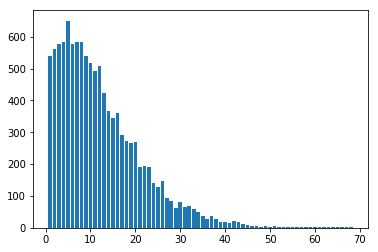

n genes (total) = 5622


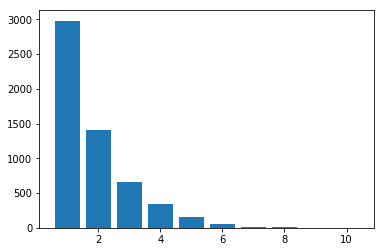

n genes (total) = 5270


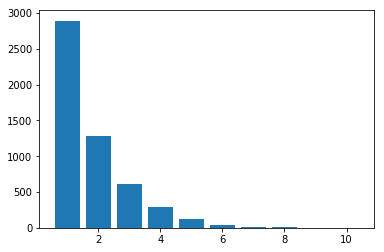

n genes (total) = 4692


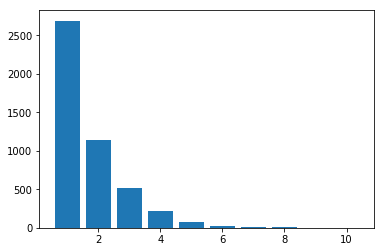

n genes (total) = 3944


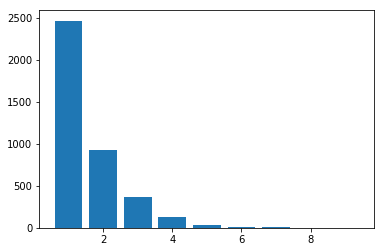

In [18]:
import matplotlib.pyplot as plt

import numpy as np

f = plt.figure()

t1 = df.query("num_sites >= 2").groupby("num_sites").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


f = plt.figure()

t1 = df.query("num_sites_pas_4 >= 2").groupby("num_sites_pas_4").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


f = plt.figure()

t1 = df.query("num_sites_pas_3 >= 2").groupby("num_sites_pas_3").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


f = plt.figure()

t1 = df.query("num_sites_pas_2 >= 2").groupby("num_sites_pas_2").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


f = plt.figure()

t1 = df.query("num_sites_pas_1 >= 2").groupby("num_sites_pas_1").agg({"gene" : "nunique"}).reset_index(drop=True)

print("n genes (total) = " + str(int(np.sum(t1['gene'].values))))

plt.bar(np.arange(len(t1)) + 1, t1['gene'].values)

plt.show()


In [16]:
#Process features

def _one_hot_encode_inplace(seq, x, i, k) :
    for j in range(len(seq)) :
        if seq[j] == 'A' :
            x[i, k, j, 0] = 1.
        elif seq[j] == 'C' :
            x[i, k, j, 1] = 1.
        elif seq[j] == 'G' :
            x[i, k, j, 2] = 1.
        elif seq[j] == 'T' :
            x[i, k, j, 3] = 1.
    return

min_pas_level = 3

max_num_sites = 10

df_sel = df.query("num_sites_pas_" + str(min_pas_level) + " >= 2 and num_sites_pas_" + str(min_pas_level) + " <= 10 and sitenum_pas_" + str(min_pas_level) + " != -1").copy().reset_index(drop=True)

genes = df_sel['gene'].unique()
gene_dict = {gene : gene_i for gene_i, gene in enumerate(genes)}

cell_types = np.array(['rpm', 'NT', 'CDC73', 'CPSF1', 'CPSF2', 'CPSF3', 'CPSF3L', 'CPSF4', 'CPSF6', 'CSTF1', 'CSTF3', 'CTR9', 'FIP1L1', 'LEO1', 'NUDT21', 'PABPC1', 'PABPN1', 'PAF1', 'PAPOLA', 'PCF11', 'RBBP6', 'RPRD1A', 'RPRD1B', 'SCAF8', 'SF3A1', 'SRSF3', 'SYMPK', 'THOC5'], dtype=np.object)

cell_type_dict = {cell_type : cell_type_i for cell_type_i, cell_type in enumerate(cell_types)}

x = np.zeros((genes.shape[0], max_num_sites, 205, 4))
x_ext = np.zeros((genes.shape[0], max_num_sites, 356, 4))

m = np.zeros((genes.shape[0], max_num_sites))

l = np.zeros((genes.shape[0], max_num_sites))

prev_pos_dict = {}

c = np.zeros((genes.shape[0], max_num_sites, cell_types.shape[0]))

gene_df_dict = {}
gene_df_dict['gene'] = ['N/A'] * genes.shape[0]
gene_df_dict['strand'] = ['N/A'] * genes.shape[0]
gene_df_dict['chrom'] = ['N/A'] * genes.shape[0]

gene_df_cols = ['gene', 'strand', 'chrom']

for k in range(max_num_sites) :
    
    gene_df_dict['gene_id' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['site_type' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['pas' + "_" + str(k)] = [-1] * genes.shape[0]
    gene_df_dict['wide_seq_ext' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['pas_exists' + "_" + str(k)] = [0] * genes.shape[0]
    gene_df_dict['dist' + "_" + str(k)] = [-1] * genes.shape[0]
    
    gene_df_dict['pas_pos' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['cut_mode' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    gene_df_dict['cut_mode_hg38' + "_" + str(k)] = ['N/A'] * genes.shape[0]
    
    gene_df_cols.extend([
        'gene_id' + "_" + str(k),
        'site_type' + "_" + str(k),
        'pas' + "_" + str(k),
        'wide_seq_ext' + "_" + str(k),
        'pas_exists' + "_" + str(k),
        'dist' + "_" + str(k),
        
        'pas_pos' + "_" + str(k),
        'cut_mode' + "_" + str(k),
        'cut_mode_hg38' + "_" + str(k),
    ])

for index, row in df_sel.iterrows() :
    gene = row['gene']
    gene_id = row['gene_id']
    
    strand = row['strand']
    chrom = row['chrom']
    
    i = gene_dict[gene]
    k = row["sitenum_pas_" + str(min_pas_level)] - 1
    
    if i % 1000 == 0 and k == 0 :
        print("Processing gene " + str(i) + "...")
    
    seq = row['wide_seq_ext'][175-70:175-70+205]
    
    _one_hot_encode_inplace(seq, x, i, k)
    _one_hot_encode_inplace(row['wide_seq_ext'], x_ext, i, k)
    
    m[i, k] = 1.
    
    if gene not in prev_pos_dict :
        l[i, k] = 0.
    else :
        l[i, k] = np.abs(row['cut_mode'] - prev_pos_dict[gene])
    
    gene_df_dict['gene'][i] = gene
    gene_df_dict['strand'][i] = strand
    gene_df_dict['chrom'][i] = chrom
    
    gene_df_dict['gene_id' + "_" + str(k)][i] = gene_id
    gene_df_dict['pas' + "_" + str(k)][i] = row['pas']
    gene_df_dict['site_type' + "_" + str(k)][i] = row['site_type']
    gene_df_dict['wide_seq_ext' + "_" + str(k)][i] = row['wide_seq_ext']
    gene_df_dict['pas_exists' + "_" + str(k)][i] = int(m[i, k])
    gene_df_dict['dist' + "_" + str(k)][i] = l[i, k]
    
    gene_df_dict['pas_pos' + "_" + str(k)][i] = row['pas_pos']
    gene_df_dict['cut_mode' + "_" + str(k)][i] = row['cut_mode']
    gene_df_dict['cut_mode_hg38' + "_" + str(k)][i] = row['cut_mode_hg38']
    
    prev_pos_dict[gene] = row['cut_mode']
    
    for cell_type_i in range(cell_types.shape[0]) :
        cell_type = cell_types[cell_type_i]
        
        c[i, k, cell_type_i] = row[cell_type]

gene_df = pd.DataFrame(gene_df_dict)
gene_df = gene_df[gene_df_cols]

print(len(gene_df))
print("x.shape = " + str(x.shape))
print("x_ext.shape = " + str(x_ext.shape))
print("m.shape = " + str(m.shape))
print("l.shape = " + str(l.shape))
print("c.shape = " + str(c.shape))


Processing gene 0...
Processing gene 1000...
Processing gene 2000...
Processing gene 3000...
Processing gene 4000...
Processing gene 5000...
5267
x.shape = (5267, 10, 205, 4)
x_ext.shape = (5267, 10, 356, 4)
m.shape = (5267, 10)
l.shape = (5267, 10)
c.shape = (5267, 10, 28)


In [17]:

total_c = np.sum(c, axis=(1, 2))

x = x[total_c > 0, ...]
x_ext = x_ext[total_c > 0, ...]
m = m[total_c > 0, :]
l = l[total_c > 0, :]
c = c[total_c > 0, ...]
gene_df = gene_df.iloc[np.nonzero(total_c > 0)[0]].copy().reset_index(drop=True)

print(len(gene_df))
print("x.shape = " + str(x.shape))
print("x_ext.shape = " + str(x_ext.shape))
print("m.shape = " + str(m.shape))
print("l.shape = " + str(l.shape))
print("c.shape = " + str(c.shape))


5267
x.shape = (5267, 10, 205, 4)
x_ext.shape = (5267, 10, 356, 4)
m.shape = (5267, 10)
l.shape = (5267, 10)
c.shape = (5267, 10, 28)


In [18]:

y = c / np.sum(c, axis=1, keepdims=True)
y[np.isnan(y)] = 0.

s = np.array(np.sum(c, axis=1) > 0, dtype=np.float)


/home/jlinder2/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [19]:

gene_df.to_csv("polyadb_features_pas_" + str(min_pas_level) + "_utr3_perturb.csv", sep='\t')


In [21]:

np.savez("polyadb_features_pas_" + str(min_pas_level) + "_utr3_perturb.npz", x=x, x_ext=x_ext, m=m, l=l, c=c, y=y, s=s)

np.savez("polyadb_features_pas_" + str(min_pas_level) + "_utr3_perturb_no_x.npz", m=m, l=l, c=c, y=y, s=s)


In [22]:

save_dict = np.load("polyadb_features_pas_3_utr3_perturb_no_x.npz")
m, l, c, y, s = save_dict['m'], save_dict['l'], save_dict['c'], save_dict['y'], save_dict['s']


In [22]:

dist_index = np.array([np.nonzero(m[i, :])[0][-1] for i in range(m.shape[0])])

y_dist = []
for i in range(y.shape[0]) :
    y_dist.append(y[i, dist_index[i], :][None, :])

y_dist = np.concatenate(y_dist, axis=0)

dist_mask = np.zeros(m.shape)
for i in range(m.shape[0]) :
    dist_mask[i, dist_index[i]] = 1.


In [23]:

cell_types = np.array(['rpm', 'NT', 'CDC73', 'CPSF1', 'CPSF2', 'CPSF3', 'CPSF3L', 'CPSF4', 'CPSF6', 'CSTF1', 'CSTF3', 'CTR9', 'FIP1L1', 'LEO1', 'NUDT21', 'PABPC1', 'PABPN1', 'PAF1', 'PAPOLA', 'PCF11', 'RBBP6', 'RPRD1A', 'RPRD1B', 'SCAF8', 'SF3A1', 'SRSF3', 'SYMPK', 'THOC5'], dtype=np.object)

cell_type_dict = {cell_type : cell_type_i for cell_type_i, cell_type in enumerate(cell_types)}


n = 5267
SpearmanrResult(correlation=0.821364836472268, pvalue=0.0)
(0.8027300007698112, 0.0)


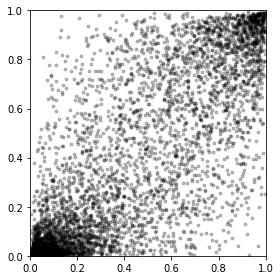

In [25]:
#PolyADB annotated distal site comparison

import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

cell_type_1 = 'rpm'
cell_type_2 = 'NT'

min_count_1 = 0.
min_count_2 = 10.

cell_type_1_ix = cell_type_dict[cell_type_1]
cell_type_2_ix = cell_type_dict[cell_type_2]

keep_index = np.nonzero((np.sum(c[..., cell_type_1_ix], axis=-1) >= min_count_1) & (np.sum(c[..., cell_type_2_ix], axis=-1) >= min_count_2))[0]

print("n = " + str(keep_index.shape[0]))

print(spearmanr(y_dist[keep_index, cell_type_1_ix], y_dist[keep_index, cell_type_2_ix]))
print(pearsonr(y_dist[keep_index, cell_type_1_ix], y_dist[keep_index, cell_type_2_ix]))

f = plt.figure(figsize=(4, 4))

plt.scatter(y_dist[keep_index, cell_type_1_ix], y_dist[keep_index, cell_type_2_ix], color='black', alpha=0.25, s=8)

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.tight_layout()

plt.show()


NT vs. CDC73
n = 5055
SpearmanrResult(correlation=0.9750539570429886, pvalue=0.0)
(0.9846600912724476, 0.0)


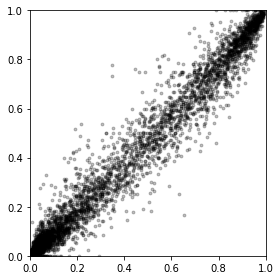

NT vs. CPSF1
n = 5164
SpearmanrResult(correlation=0.9689793565326417, pvalue=0.0)
(0.9724669024408563, 0.0)


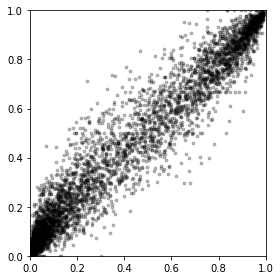

NT vs. CPSF2
n = 5195
SpearmanrResult(correlation=0.9741926705449473, pvalue=0.0)
(0.9766110164828116, 0.0)


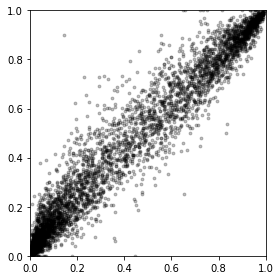

NT vs. CPSF3
n = 5210
SpearmanrResult(correlation=0.9784803708042666, pvalue=0.0)
(0.9802802272402124, 0.0)


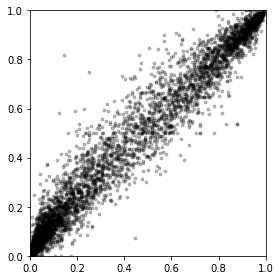

NT vs. CPSF3L
n = 4864
SpearmanrResult(correlation=0.9610740902389276, pvalue=0.0)
(0.978394238702559, 0.0)


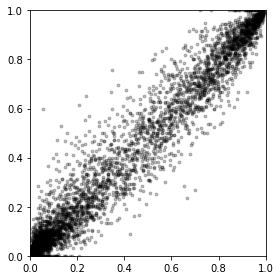

NT vs. CPSF4
n = 4974
SpearmanrResult(correlation=0.9589531960994394, pvalue=0.0)
(0.9662141466494838, 0.0)


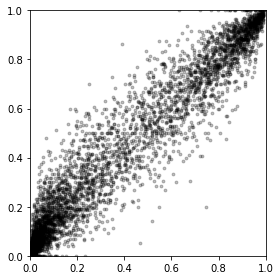

NT vs. CPSF6
n = 5257
SpearmanrResult(correlation=0.9404204340515289, pvalue=0.0)
(0.9078228071671943, 0.0)


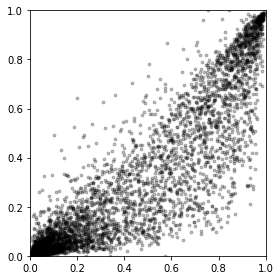

NT vs. CSTF1
n = 5100
SpearmanrResult(correlation=0.971883942118247, pvalue=0.0)
(0.9796054725105341, 0.0)


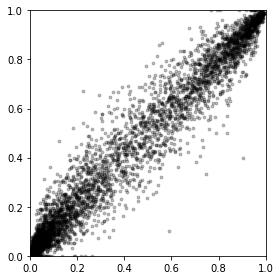

NT vs. CSTF3
n = 5216
SpearmanrResult(correlation=0.966175618302429, pvalue=0.0)
(0.9683614083931555, 0.0)


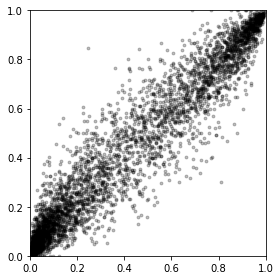

NT vs. CTR9
n = 5115
SpearmanrResult(correlation=0.9784407845757428, pvalue=0.0)
(0.9838629964154828, 0.0)


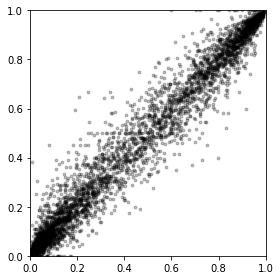

NT vs. FIP1L1
n = 5046
SpearmanrResult(correlation=0.9644785929270852, pvalue=0.0)
(0.9687039048146195, 0.0)


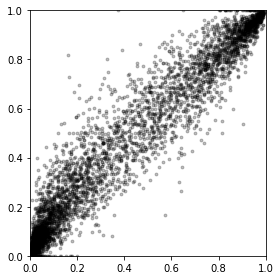

NT vs. LEO1
n = 5262
SpearmanrResult(correlation=0.9927891750614752, pvalue=0.0)
(0.9936795730362967, 0.0)


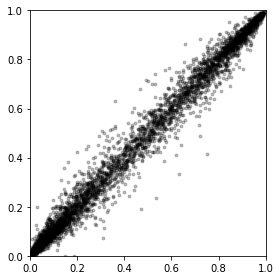

NT vs. NUDT21
n = 5192
SpearmanrResult(correlation=0.8925655057773901, pvalue=0.0)
(0.8470834005022289, 0.0)


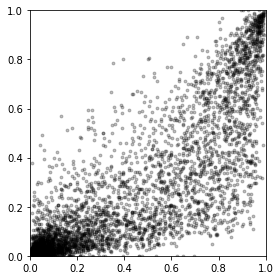

NT vs. PABPC1
n = 5231
SpearmanrResult(correlation=0.9907217201717271, pvalue=0.0)
(0.9920970228428011, 0.0)


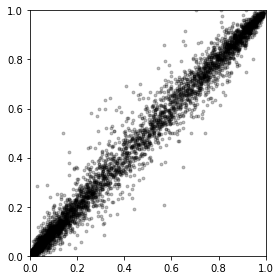

NT vs. PABPN1
n = 5234
SpearmanrResult(correlation=0.9868614018616282, pvalue=0.0)
(0.9883314458218786, 0.0)


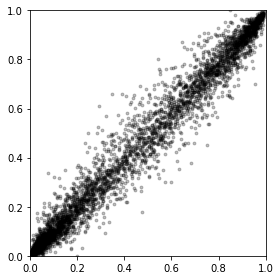

NT vs. PAF1
n = 4818
SpearmanrResult(correlation=0.9660302976021368, pvalue=0.0)
(0.9788456726669531, 0.0)


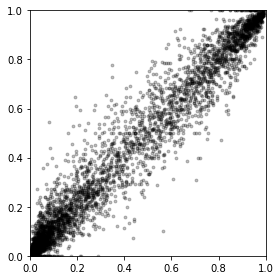

NT vs. PAPOLA
n = 5248
SpearmanrResult(correlation=0.9903297518640427, pvalue=0.0)
(0.9904321751721639, 0.0)


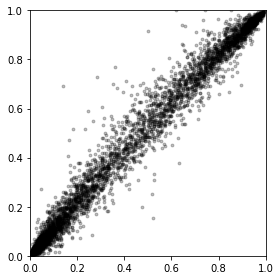

NT vs. PCF11
n = 5087
SpearmanrResult(correlation=0.976767788247931, pvalue=0.0)
(0.9806927408261735, 0.0)


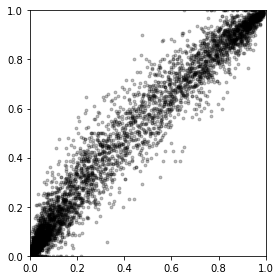

NT vs. RBBP6
n = 5228
SpearmanrResult(correlation=0.9790176073417867, pvalue=0.0)
(0.9775180238105726, 0.0)


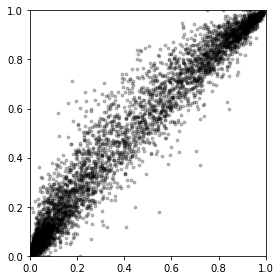

NT vs. RPRD1A
n = 5208
SpearmanrResult(correlation=0.9883445607859678, pvalue=0.0)
(0.9921415453754213, 0.0)


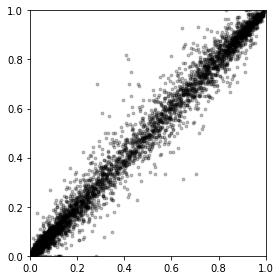

NT vs. RPRD1B
n = 5255
SpearmanrResult(correlation=0.992871435489016, pvalue=0.0)
(0.9935379522556784, 0.0)


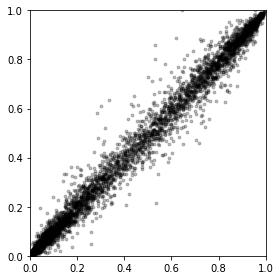

NT vs. SCAF8
n = 5263
SpearmanrResult(correlation=0.9950755692855895, pvalue=0.0)
(0.9956598820170155, 0.0)


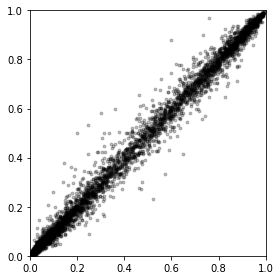

NT vs. SF3A1
n = 3919
SpearmanrResult(correlation=0.9369491501110663, pvalue=0.0)
(0.9751583347981829, 0.0)


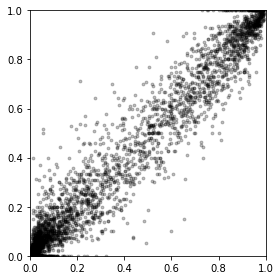

NT vs. SRSF3
n = 4941
SpearmanrResult(correlation=0.9628408287711419, pvalue=0.0)
(0.97375495379757, 0.0)


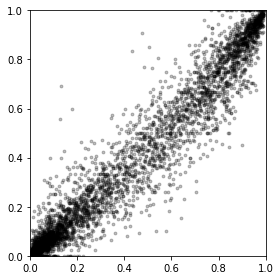

NT vs. SYMPK
n = 4736
SpearmanrResult(correlation=0.9571236331532373, pvalue=0.0)
(0.9705724095187731, 0.0)


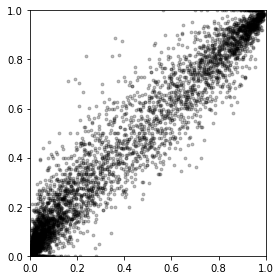

NT vs. THOC5
n = 5126
SpearmanrResult(correlation=0.962649260663901, pvalue=0.0)
(0.9643536705864496, 0.0)


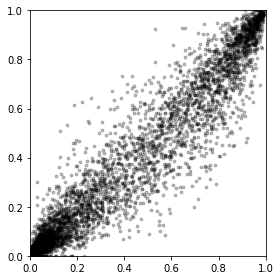

In [29]:
#Comparison for identified sites in perturb-seq data only, all perturbations

import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

cell_type_1 = 'NT'

min_count_1 = 10.
min_count_2 = 10.

cell_type_1_ix = cell_type_dict[cell_type_1]

for cell_type_2_ix, cell_type_2 in enumerate(cell_types.tolist()) :
    
    if cell_type_2_ix in [0, 1] :
        continue
    
    print(cell_type_1 + " vs. " + cell_type_2)

    keep_index = np.nonzero((np.sum(c[..., cell_type_1_ix], axis=-1) >= min_count_1) & (np.sum(c[..., cell_type_2_ix], axis=-1) >= min_count_2))[0]

    print("n = " + str(keep_index.shape[0]))

    print(spearmanr(y_dist[keep_index, cell_type_1_ix], y_dist[keep_index, cell_type_2_ix]))
    print(pearsonr(y_dist[keep_index, cell_type_1_ix], y_dist[keep_index, cell_type_2_ix]))

    f = plt.figure(figsize=(4, 4))

    plt.scatter(y_dist[keep_index, cell_type_1_ix], y_dist[keep_index, cell_type_2_ix], color='black', alpha=0.25, s=8)

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.tight_layout()

    plt.show()
